<a href="https://colab.research.google.com/github/RavitejaManchikanti/Employee-prediction/blob/master/emp_churn_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd;
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

In [3]:
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['HR_comma2.csv']))

Saving HR_comma2.csv to HR_comma2.csv


In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


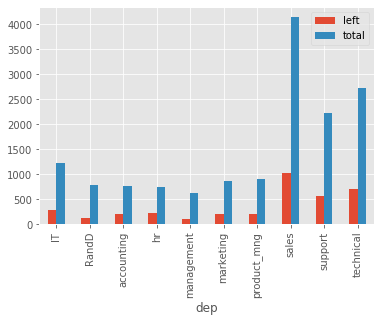

In [5]:
data1 = data[['left', 'sales']]
data1 = data1.groupby('sales').agg(['sum', 'count']).reset_index()
data1.columns = data1.columns.get_level_values(0)
data1.columns = ['dep', 'left', 'total']
data1.plot(x='dep',y=['left', 'total'],kind='bar')
plt.show()

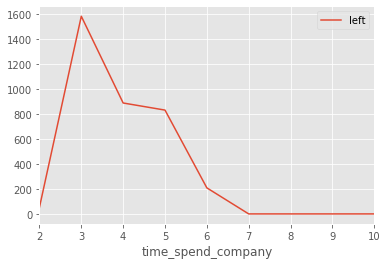

In [6]:
data1 = data[['left', 'time_spend_company']]
data1 = data1.groupby('time_spend_company').agg(['sum', 'count']).reset_index()
data1.columns = data1.columns.get_level_values(0)
data1.columns = ['time_spend_company', 'left', 'total']
data1.plot(x='time_spend_company',y=['left'])
plt.show()

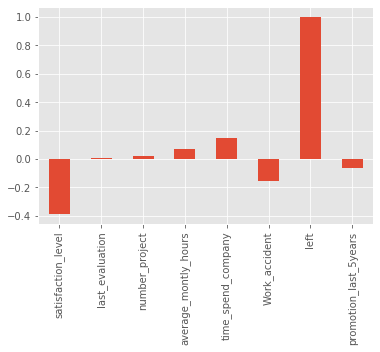

In [7]:
corr = data.corr()
corr['left'].plot(kind='bar')
plt.show()

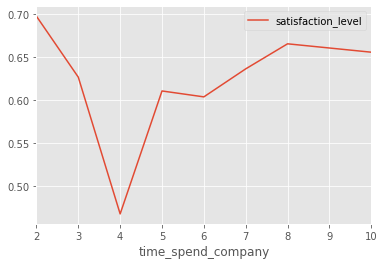

In [8]:
data1 = data[['time_spend_company', 'satisfaction_level']]
data1 = data1.groupby('time_spend_company').agg(['mean']).reset_index()
data1.columns = data1.columns.get_level_values(0)
data1.plot(x='time_spend_company', y='satisfaction_level')
plt.show()

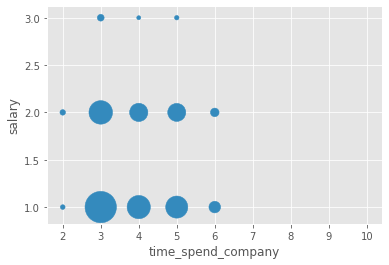

,time_spend_company,salary,left
0,2,3,0
1,2,1,22
2,2,2,31
3,3,3,46
4,3,1,986
5,3,2,554
6,4,3,16
7,4,1,541
8,4,2,333
9,5,3,20


In [9]:
data1 = data[['time_spend_company', 'salary','left']]
data1 = data1.groupby(['time_spend_company','salary']).agg(['sum']).reset_index()
data1.columns = data1.columns.get_level_values(0)

data1.loc[:,'salary'] = data1.apply(lambda row : {'high':3, 'medium':2, 'low':1}[row['salary']], 1)
data1.plot(x='time_spend_company', y='salary', s=data1['left'], kind='scatter')
plt.show()
data1

In [10]:
from sklearn.naive_bayes import GaussianNB

data2 = data[['last_evaluation','number_project', 'average_montly_hours', 
'time_spend_company', 'salary', 'left', 'promotion_last_5years']]

data2.loc[:,'salary']

0           low
1        medium
2        medium
3           low
4           low
          ...  
14994       low
14995       low
14996       low
14997       low
14998       low
Name: salary, Length: 14999, dtype: object

In [11]:
from sklearn.naive_bayes import GaussianNB

data2 = data[['last_evaluation','number_project', 'average_montly_hours', 
'time_spend_company', 'salary', 'left', 'promotion_last_5years']]
data2
data2.loc[:,'salary'] = data2.apply(lambda row : {'high':3, 'medium':2, 'low':1}[row['salary']], 1)

gnb = GaussianNB()

train = data2.sample(frac=0.8, random_state=1)
test  = data2.loc[~data.index.isin(train.index)]

train_x = train[['number_project', 'average_montly_hours', 'time_spend_company', 'salary', 'promotion_last_5years']]
test_x = test[['number_project', 'average_montly_hours', 'time_spend_company', 'salary', 'promotion_last_5years']]

model = gnb.fit(train_x, train.left)
y_predict = model.predict(test_x)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy_score(test.left, y_predict)

0.827

In [13]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
dtm = dtc.fit(train_x, train.left)
y_predict = dtm.predict(test_x)

accuracy_score(test.left, y_predict)

0.9566666666666667

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

max_depth      = range(1, 10)
max_leaf_nodes = range(2, 10) 
parameters = {'max_depth': max_depth, 'max_leaf_nodes': max_leaf_nodes}

gs = GridSearchCV(tree.DecisionTreeClassifier(), parameters, cv=5)
gs.fit(train_x, train.left)

gs.best_params_

{'max_depth': 6, 'max_leaf_nodes': 9}

In [15]:
y_predict = gs.predict(test_x)
print(classification_report(test.left, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2298
           1       0.80      0.92      0.85       702

    accuracy                           0.93      3000
   macro avg       0.89      0.92      0.90      3000
weighted avg       0.93      0.93      0.93      3000

